In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def armed_bandit(means: np.array, action: int) -> float:
  """
  Takes an integer action. Returns a reward from N(means[action], 1)
  Action lies in {0, 1, ... len(means)-1}
  """
  assert action <= len(means)
  mean = means[action]
  reward = np.random.normal(loc=mean, scale=1.0)
  return reward

In [4]:
means = np.random.randn(10)
print(means)

[-1.23164393  1.72563041 -0.65951184 -1.37386818  0.34036883  0.08529813
 -1.0794054   1.03931861 -1.04503642 -0.38898038]


In [26]:
def greedy(n_bandits: int=10,
           steps: int=1000,
           optimism: float=0.0) -> np.array:
  actions = [0 for _ in range(n_bandits)]
  rewards = []
  estimates = np.zeros(n_bandits) * optimism
  for i in range(steps):
    action = np.random.choice(np.flatnonzero(np.isclose(estimates, estimates.max())))
    reward = armed_bandit(means, action)
    actions[action] += 1
    rewards.append(reward)
    estimates[action] += (reward - estimates[action]) / actions[action]
  return np.array(rewards)

In [27]:
def epsilon_greedy(n_bandits: int=10,
                   steps: int=1000,
                   eps: float=0.1) -> np.array:
  actions = [0 for _ in range(n_bandits)]
  rewards = []
  estimates = np.zeros(n_bandits) + 0.001 * np.random.randn(n_bandits)
  for i in range(steps):

    c = np.random.choice(2, size=1, p = [eps, 1.0 - eps]).item()
    if c == 1:
      action = np.argmax(estimates)
    else:
      action = np.random.choice(n_bandits, 1).item()

    reward = armed_bandit(means, action)
    actions[action] += 1
    rewards.append(reward)
    estimates[action] += (reward - estimates[action]) / actions[action]
  return np.array(rewards)

In [28]:
def ucb(n_bandits: int=10,
        steps: int=1000,
        c: float=2.0) -> np.array:
  actions = [0.0001 for _ in range(n_bandits)]
  rewards = []
  estimates = np.zeros(n_bandits)
  for i in range(steps):
    scores = estimates + c * np.sqrt(np.log(i+1)/actions)
    action = np.random.choice(np.flatnonzero(np.isclose(scores, scores.max())))
    reward = armed_bandit(means, action)
    actions[action] += 1
    rewards.append(reward)
    estimates[action] += (reward - estimates[action]) / actions[action]
  return np.array(rewards)

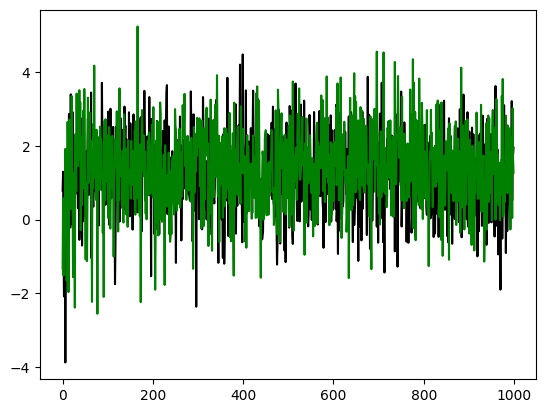

In [32]:
hist_0 = greedy()
hist_2 = ucb()
plt.plot(hist_0, 'k')
plt.plot(hist_2, 'g')

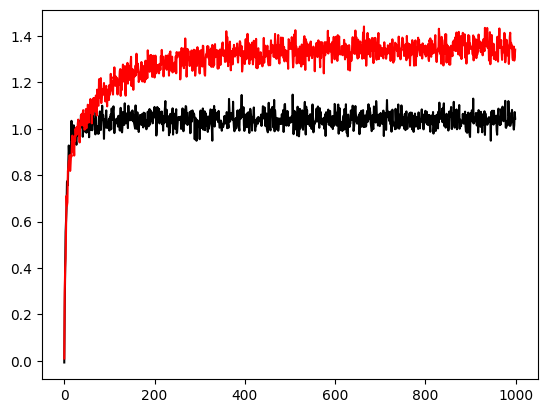

In [36]:
k = 10
samples = 1000
temp = np.zeros(1000)
for i in range(samples):
  means = np.random.randn(k)
  temp += greedy()
temp /= samples
plt.plot(temp,'k')
temp = np.zeros(1000)
for i in range(samples):
  means = np.random.randn(k)
  temp += epsilon_greedy()
temp /= samples
plt.plot(temp, 'r')